# Analyzing cross sections with the CrossSection class

## Initializing a CrossSection

The CrossSection class takes a number of arguments:

`CrossSection(df, name=None, morphType=None, metric=False, manN=None, waterSlope=None, project=True, bkfEl=None, wsEl=None, tobEl=None, thwStation=None, fillFraction=1)`

The only required argument is `df`, which is either a dictionary or pandas dataframe that has (at the minimum) columns/keys named `'exes'`, `'whys'`, and `'zees'`. These (generally) correspond to the easting, northing and elevation of the survey, though all that matters is that `'exes'` and `'whys'` correspond to planform coordinates and `'zees'` specifies an elevation. If a dictionary is passed then it will be coerced to a pandas dataframe. Do *not* pass a column/key named `'Station'`; this will be calculated for you.

Let's make a simple CrossSection:

In [18]:
import pyfluv

x = [1,2,4,3,6]
y = [0,0,2,2,4]
z = [5,4,2,1,4]

surveyDict = {'exes':x,
              'whys':y,
              'zees':z}

myCross = pyfluv.CrossSection(surveyDict, name='myCross', wsEl = 3)

The warning indicates that there is an overhang present in the cross section. Overhangs are removed for calculation purposes. By default the overhangs are "filled in", but if `fillFraction` is set to `0` then the overhang will be "cut back". The geometry is also checked to make it is is not self-intersecting, which will throw an exception. Occasionally an overhang will be detected but cannot be removed due to floating point errors. This happens when the overhang is very small, so it is not an issue.

The CrossSection class contains a couple of methods for quickly visualizing cross sections, `qplot()` (quick plot) and `planplot()` (planform plot).

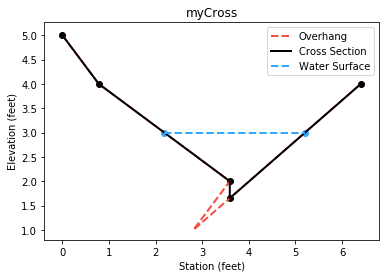

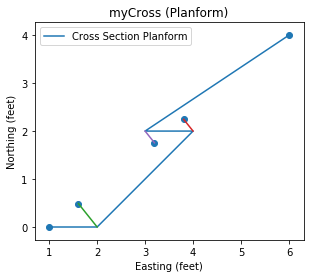

In [19]:
import matplotlib.pyplot as plt

plt.figure()
myCross.qplot(showCutSection=True)

plt.figure()
myCross.planplot()

In the planform plot, the actual path of the profile is shown by the blue line. By default the CrossSection class projects all shots onto a centerline connecting the first and last points; these projections are shown by the colored lines terminating in a point.

## Extracting statistics

Of course, this synthetic data isn't particularly interesting. Pyfluv comes packaged with sample survey data. We can pull a `StreamSurvey` object containing the survey data for a mitigation site in middle Tennessee. This data was collected in 2018, which was the fifth and final year of the project.

In [20]:
survey = pyfluv.standard_survey()
crosses = survey.get_cross_objects()

As you can see a number of cross sections have overhangs, one of which couldn't be removed.

,exes,whys,zees,desc,Station
0,19849.15453,20356.18241,629.954179,xsTrib2ri-lbp,0.000000
1,19849.29498,20356.01793,629.676051,xsTrib2ri,0.195857
2,19852.71920,20354.43489,629.932472,xsTrib2ri,3.968200
3,19855.20509,20353.31029,629.829911,xsTrib2ri,6.696637
4,19858.77227,20351.87764,629.112396,xsTrib2ri,10.537036
5,19860.97319,20350.84375,628.903624,xsTrib2ri,12.968484
6,19863.39254,20349.88281,628.466729,xsTrib2ri,15.568709
7,19864.00355,20349.63319,628.146804,xsTrib2ri-bkf,16.228264
8,19865.23944,20349.08568,627.620827,xsTrib2ri,17.579947
9,19865.47375,20348.92683,627.481479,xsTrib2ri,17.858953


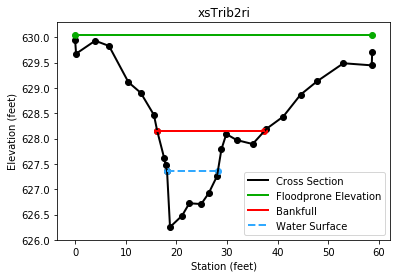

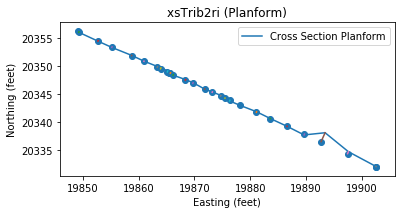

In [21]:
plt.figure()
crosses[3].qplot(ve=10) # you can specify a vertical exaggeration with the ve parameter

plt.figure()
crosses[3].planplot()

crosses[3].df

You can see in the data that bkf (bankfull) and ws (water surface) calls were made; the StreamSurvey object used to import our survey data has already set these values for us. Because we have a bankfull elevation we can extract a number of statistics. If `bkfEl` is `None` then trying to call these methods will throw an exception.

In [22]:
print(f'Bankfull area is {crosses[2].area()}')
print(f'Bankfull width is {crosses[2].width()}')
print(f'Bankfull mean depth is {crosses[2].mean_depth()}')
print(f'Bankfull max depth is {crosses[2].max_depth()}')
print(f'Bankfull width is {crosses[2].width()}')
print(f'Bankfull hydraulic radius is {crosses[2].hydraulic_radius()}')
print(f'Bankfull wetted perimeter is {crosses[2].wetted_perimeter()}')
print(f'Flood prone elevation is {crosses[2].flood_prone_elevation()}')
print(f'Flood prone width is {crosses[2].flood_prone_width()}')
print(f'Entrenchment ratio is {crosses[2].entrenchment_ratio()}')
print(f'Width/depth ratio is {crosses[2].widthdepth_ratio()}')

Bankfull area is 10.881718791410094
Bankfull width is 10.909969643564398
Bankfull mean depth is 0.9974105471343364
Bankfull max depth is 1.9462190000000419
Bankfull width is 10.909969643564398
Bankfull hydraulic radius is 0.901163024934776
Bankfull wetted perimeter is 12.075194487920415
Flood prone elevation is 630.9113365000001
Flood prone width is 57.83791302340068
Entrenchment ratio is 5.30138166401941
Width/depth ratio is 10.938293839893582


The bankfull elevation can be redefined and the statistics recalculated.

Bankfull area is 10.881718791410094
Bankfull width is 10.909969643564398
Bankfull mean depth is 0.9974105471343364
Bankfull max depth is 1.9462190000000419
Bankfull width is 10.909969643564398
Bankfull hydraulic radius is 0.901163024934776
Bankfull wetted perimeter is 12.075194487920415
Flood prone elevation is 630.9113365000001
Flood prone width is 57.83791302340068
Entrenchment ratio is 5.30138166401941
Width/depth ratio is 10.938293839893582


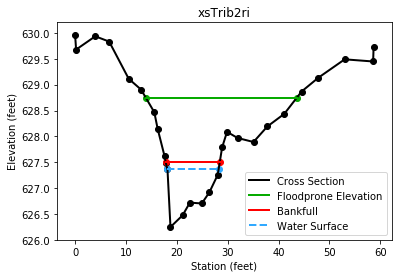

In [23]:
crosses[3].bkfEl = 627.5

plt.figure()
crosses[3].qplot()

print(f'Bankfull area is {crosses[2].area()}')
print(f'Bankfull width is {crosses[2].width()}')
print(f'Bankfull mean depth is {crosses[2].mean_depth()}')
print(f'Bankfull max depth is {crosses[2].max_depth()}')
print(f'Bankfull width is {crosses[2].width()}')
print(f'Bankfull hydraulic radius is {crosses[2].hydraulic_radius()}')
print(f'Bankfull wetted perimeter is {crosses[2].wetted_perimeter()}')
print(f'Flood prone elevation is {crosses[2].flood_prone_elevation()}')
print(f'Flood prone width is {crosses[2].flood_prone_width()}')
print(f'Entrenchment ratio is {crosses[2].entrenchment_ratio()}')
print(f'Width/depth ratio is {crosses[2].widthdepth_ratio()}')

If you specify a Manning's n and a slope, then additional statistics can be calculated.

In [24]:
crosses[3].manN = 0.025
crosses[3].waterSlope = 0.02

print(f'Bankfull velocity is {crosses[3].flow_velocity()}')
print(f'Bankfull discharge is {crosses[3].discharge_rate()}')
print(f'Froude number is {crosses[3].froude()}')
print(f'Shear velocity is {crosses[3].shear_velocity()}')
print(f'Shear stress is {crosses[3].shear_stress()}')

Bankfull velocity is 6.64014176582514
Bankfull discharge is 53.18419491264783
Froude number is 1.3473599736521171
Shear velocity is 0.6707797364180684
Shear stress is 0.9425205625181421


If a top of bank elevation is specified, you can calculate the bank height ratio.

Bank height ratio is 2.5224255283517896


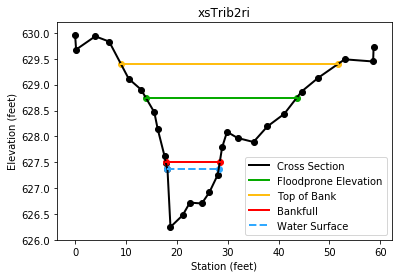

In [25]:
crosses[3].tobEl = 629.4

plt.figure()
crosses[3].qplot()

print(f'Bank height ratio is {crosses[3].bank_height_ratio()}')

You can check the bankfull, top of bank and floodprone widths.

In [26]:
help(pyfluv.CrossSection.shear_stress)

Help on function shear_stress in module pyfluv.streamgeometry:

shear_stress(self)
    Calculates the shear stress at bkf.
    
    If metric, units are N/m^2. If imperial, units are lbs/ft^2



Sometimes the floodprone or bankfull elevation will be unbounded on one or both sides by the surveyed cross section.

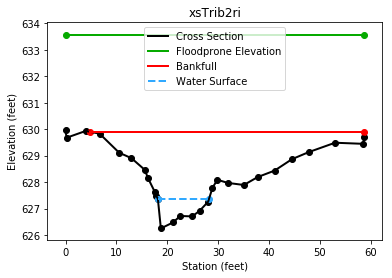

In [27]:
crosses[3].bkfEl = 629.9
crosses[3].tobEl = None

plt.figure()
crosses[3].qplot()

You can check the status of this by checking on the dictionary attribute `boundTruths`. The dictionary has two keys `bkfWidth` and `floodproneWidth` which each point to a tuple. Each tuple has two boolean entries indicating if the left and right side of the feature intersects the survey.

In [28]:
crosses[3].boundTruths

{'bkfWidth': (True, False), 'floodproneWidth': (False, False)}

## Estimating elevations of stream features

### Bankfull elevation

Sometimes you don't have the bankfull elevation or you want to recalculate it based on a desired statistic. For example, `cross[12]` did not have a field call for bankfull.

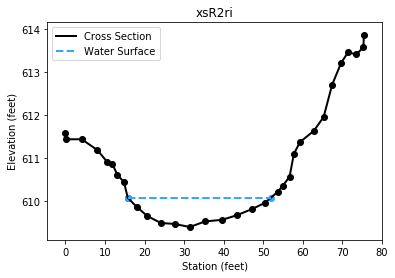

In [29]:
plt.figure()
crosses[12].qplot()

If, for example, we know it should have a bankfull area of about 60 square feet based on a regional curve, then we can set it using the `bkf_binary_search()` method.

Bankfull area is 60.00809176216717


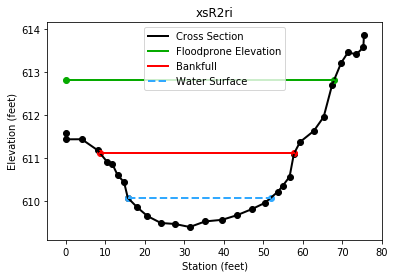

In [30]:
estimatedElevation = crosses[12].bkf_binary_search(attributeMethod=crosses[12].area, target=60, epsilon=0.01)
crosses[12].bkfEl = estimatedElevation

plt.figure()
crosses[12].qplot()
print(f'Bankfull area is {crosses[12].area()}')

`attributeMethod` takes the method that calculates your target parameter as its argument. `epsilon` is the maximum allowable error. By default, this is 0.1% of the target value. For `bankfull_binary_search`, the target attribute must vary monotically increasing with bankfull elevation. If the attribute does not vary monotically increasing with bankfull elevation then `bankfull_brute_search` must be used instead. For example, the mean depth of a cross section is not guaranteed to increase with bankfull depth (e.g., in the case that the survey includes side channels). The binary search is generally must faster and returns better results so it is preferred, and most stream statistics have a monotonic increasing relationship with bankfull elevation.

### Top of bank elevation

The top of bank elevation also isn't always known, either because it wasn't called in the field or the data was extracted via LiDAR. CrossSection objects can estimate this elevation by finding the point of maximum flow expansion - the elevation where the second derivative of the bankfull width with respect to bankfull elevation is at its greatest.

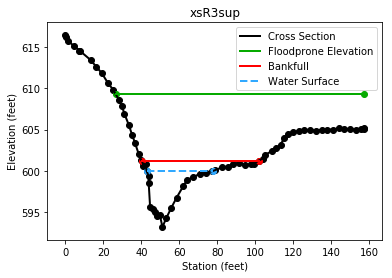

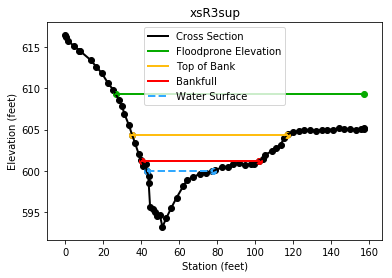

In [31]:
n = 11

plt.figure()
crosses[n].qplot()

plt.figure()
crosses[n].tobEl = crosses[n].find_release_elevation()
crosses[n].qplot()

By default derivative is evaluated using a granularity equal to 10% of the difference between the lowest and highest points in the survey. Depending on the exact nature of the survey, this granularity may or may not make sense. The optional argument `delta` is used to specify the granularity in feet or meters depending on the value of `metric`. In general as `delta` decreases the algorithm places more emphasis on smaller morphological variations will larger values of `delta` allow the algorithm to consider the more general trends in morphological variation.

The algorithm also taks an optional argument `returns`, which takes a string as an argument. The cross section is split into two sides - left of the thalweg and right of the thalweg - and finds the release elevation for each side differently. By default the algorithm returns the elevation that is the `'lower'` of the two but it can return the `'upper'` elevation instead. It can also return the elevation of the `'left'` or `'right'` side, or the elevation with the `'min'`/smaller or `'max'`/larger flow release. Finally, it can return the `'mean'` of the two elevations.

The algorithm cannot distinguish between multiple terrace levels/benches/berms.

## Other plots

The `attribute_list()` method takes a method that calculates a statistic that varies with bankfull elevation and returns two lists: a list of bankfull elevations and a list of the target statistic at the corresponding bankfull elevation.

Text(0,0.5,'Bankfull Elevation (ft)')

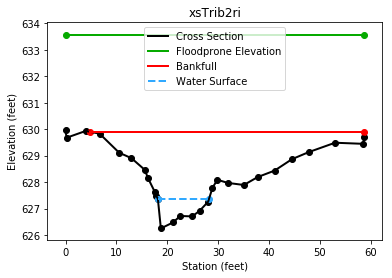

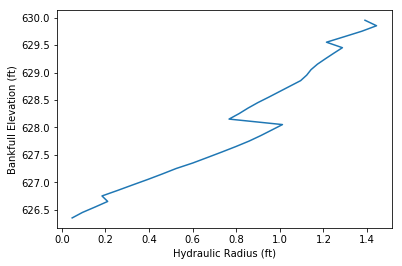

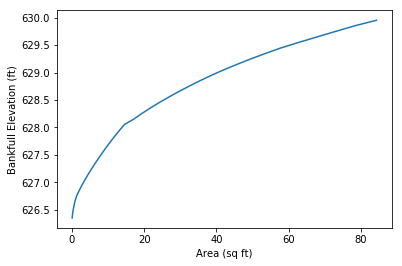

In [32]:
plt.figure()
crosses[3].qplot()

elevations, hydraulicRadii = crosses[3].attribute_list(crosses[3].hydraulic_radius, deltaEl = 0.1)
plt.figure()
plt.plot(hydraulicRadii, elevations)
plt.xlabel('Hydraulic Radius (ft)')
plt.ylabel('Bankfull Elevation (ft)')

elevations, areas = crosses[3].attribute_list(crosses[3].area, deltaEl = 0.1)
plt.figure()
plt.plot(areas,elevations)
plt.xlabel('Area (sq ft)')
plt.ylabel('Bankfull Elevation (ft)')